In [1]:
import pandas as pd

import numpy as np
np.random.seed(42)

import idx2numpy as idx2np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.utils import to_categorical

# MNIST Modeling - Summer 2024
Since Completing my General Assembly DSI ...blahblahblah placeholder...

Re-attemping classification modeling of MNIST problem, identifying handwritten digits.

In [17]:
# File paths (adjust these paths according to your setup)
train_images_path = './archive/train-images-idx3-ubyte/train-images-idx3-ubyte'
train_labels_path = './archive/train-labels-idx1-ubyte/train-labels-idx1-ubyte'
test_images_path = './archive/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte'
test_labels_path = './archive/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte'

# Load the data
X_train = idx2np.convert_from_file(train_images_path)
y_train = idx2np.convert_from_file(train_labels_path)
X_test = idx2np.convert_from_file(test_images_path)
y_test = idx2np.convert_from_file(test_labels_path)

In [18]:
print(y_train.shape)

(60000,)


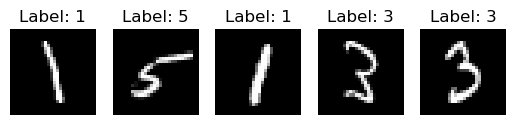

In [19]:
# Convert one-hot encoded labels back to digit values
y_train_digits = y_train

num_samples = 5

# Select random indices to sample from the dataset
random_indices = np.random.choice(X_train.shape[0]
                                  , num_samples
                                  , replace = False)

# Plot the sampled images
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X_train[idx], cmap='gray')  # Assuming images are grayscale
    plt.title(f"Label: {y_train_digits[idx]}")  # Use the digit label instead of the one-hot encoded array
    plt.axis('off')

plt.show()

In [20]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
model = Sequential([Input(shape = (28, 28, 1)) # Specify the input shape here
                    , Flatten()
                    , Dense(512, activation = 'relu')
                    , Dense(256, activation = 'relu')
                    , Dense(128, activation = 'relu')
                    , Dense(10, activation = 'softmax')
                   ])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# Train the model for more epochs
history = model.fit(X_train
                    , y_train
                    , epochs = 20
                    , validation_data = (X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9020 - loss: 0.3207 - val_accuracy: 0.9642 - val_loss: 0.1182
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9713 - loss: 0.0909 - val_accuracy: 0.9734 - val_loss: 0.0911
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9819 - loss: 0.0586 - val_accuracy: 0.9739 - val_loss: 0.0925
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9849 - loss: 0.0474 - val_accuracy: 0.9744 - val_loss: 0.0892
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9886 - loss: 0.0367 - val_accuracy: 0.9771 - val_loss: 0.0838
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9912 - loss: 0.0296 - val_accuracy: 0.9739 - val_loss: 0.1035
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9915 - loss: 0.0265 - val_accuracy: 0.9806 - val_loss: 0.0804
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9934 - loss: 0.0228 - 

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,702,304 (6.49 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,134,870 (4.33 MB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.97      0.98       892
           6       0.97      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



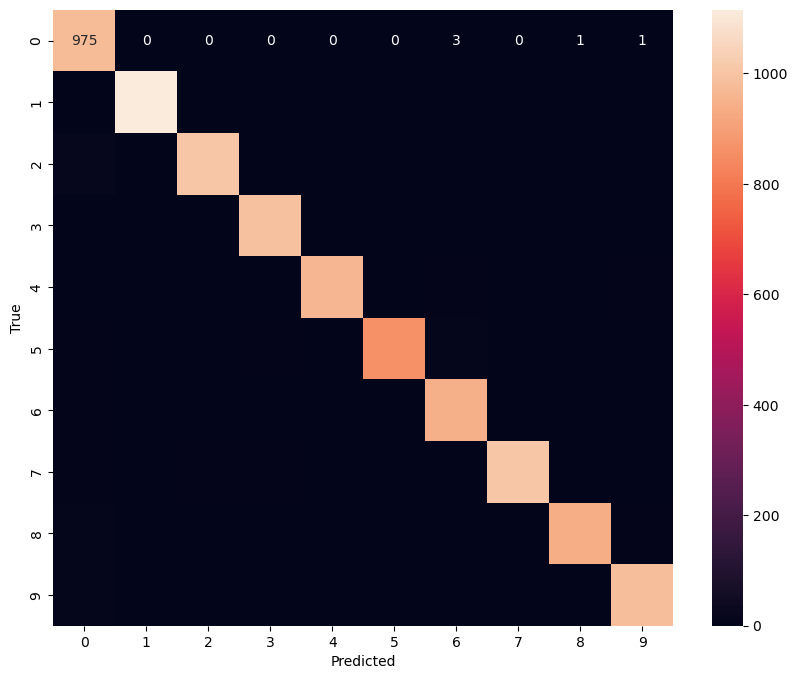

In [8]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)

# Classification report
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize = (10, 8))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

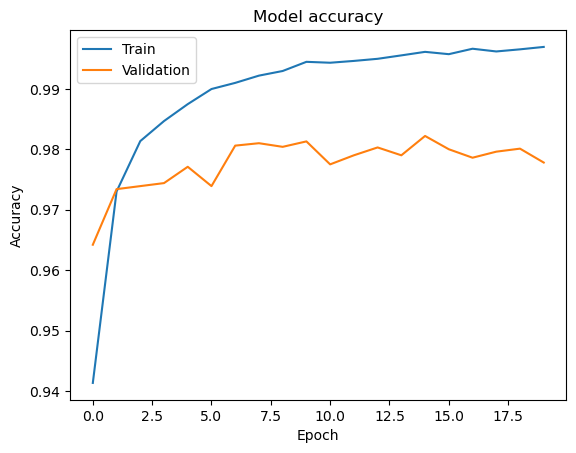

In [11]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

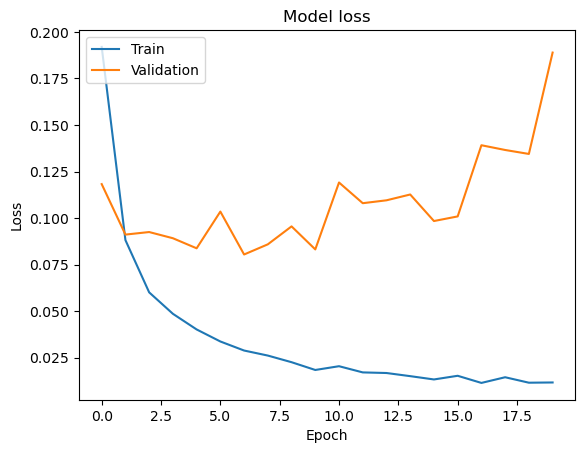

In [13]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()